# Stabla odlučivanja

Biblioteka `scikit-learn` nudi mogućnost rada sa stablima odlučivanja. Podsetimo se, stabla odlučivanja funkcionišu tako što u svakom čvoru stabla, izuzimajući listove, imamo po jedan test kojim ispitujemo kriterijume za podelu stabla. Svakom ishodu testa odgovara po jedna grana čvora koja vodi do sledećeg čvora. Nad sledećim čvorovima se opisana procedura primenjuje rekurzivno sve dok se ne ispuni neki od zaustavnih kriterijuma treniranja modela. To može biti dosegnuta maksimalna dubina stabla, minimalni broj instanci u listu, granična vrednost mere hemogonosti stabla ili nešto drugo.      

<figure style='text-align:center'>
    <img src='assets/decision_tree.png'>
    <figcaption> Stablo odlučivanja </figcaption>
</figure>

Rad sa stablima odlučivanja demonstriraćemo prvo na zadatku klasifikacije. Koristićemo `Pima Indians Diabetes` skup podataka koji objedinjuje medicinske podatke na osnovu kojih treba predvideti da li pacijentkinja ima dijabetes ili ne. Skup podataka i prateće informacije se mogu pronaći na [adresi Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database) takmičenja.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics

Prvo ćemo učitati podatke i pripremiti ih za treniranje i testiranje.

In [3]:
data = pd.read_csv('data/diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
y = data['Outcome']

In [6]:
X = data.drop(columns=['Outcome'], axis=1 )

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, stratify=y, random_state = 7)

In [8]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

U paketu `tree` biblioteke `scikit-learn` nalaze se funkcije za rad sa stablima odlučivanja i njihovu vizuelizaciju. 

In [9]:
from sklearn import tree

Na nivou svakog stabla može se zadati kriterijum za odlučivanje o homogenosti (Gini indeks ili entropija), maksimalna dubina stabla, maksimalni broj atributa koje slučajno treba odabrati, minimalna vrednost čistoće grananja, minimalni broj instanci po čvoru, ...  Pošto su neke odluke na nivou stabla nasumične, praksa je da se zbog reprodukcije eksperimenta postavlja i vrednost parametra `random_state`.

In [10]:
model = tree.DecisionTreeClassifier(criterion='gini', max_features=0.9, max_depth=3, random_state=7)

Treniranje modela i njegova evaluacija se sprovode na isti način kao i kod dosadašnjih modela tj. korišćenjem funkcija `fit` i `predict`. 

In [11]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=0.9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

In [12]:
y_predict = model.predict(X_test)

In [13]:
metrics.accuracy_score(y_test, y_predict)

0.7480314960629921

Funkcijom `plot_tree` može se nacrtati stablo odlučivanja. U svakom čvora stabla naveden je test, zatim vrednost korišćene mere homogenosti, ukupan broj instaci koji je analiziran, kao i broj instanci po klasama. 

[Text(558.0, 475.65000000000003, 'Glucose <= 0.192\ngini = 0.454\nsamples = 514\nvalue = [335, 179]\nclass = 0'),
 Text(279.0, 339.75, 'Pregnancies <= 0.477\ngini = 0.304\nsamples = 321\nvalue = [261, 60]\nclass = 0'),
 Text(139.5, 203.85000000000002, 'BMI <= -0.144\ngini = 0.218\nsamples = 241\nvalue = [211, 30]\nclass = 0'),
 Text(69.75, 67.94999999999999, 'gini = 0.032\nsamples = 123\nvalue = [121, 2]\nclass = 0'),
 Text(209.25, 67.94999999999999, 'gini = 0.362\nsamples = 118\nvalue = [90, 28]\nclass = 0'),
 Text(418.5, 203.85000000000002, 'Glucose <= -0.82\ngini = 0.469\nsamples = 80\nvalue = [50, 30]\nclass = 0'),
 Text(348.75, 67.94999999999999, 'gini = 0.087\nsamples = 22\nvalue = [21, 1]\nclass = 0'),
 Text(488.25, 67.94999999999999, 'gini = 0.5\nsamples = 58\nvalue = [29, 29]\nclass = 0'),
 Text(837.0, 339.75, 'Glucose <= 1.046\ngini = 0.473\nsamples = 193\nvalue = [74, 119]\nclass = 1'),
 Text(697.5, 203.85000000000002, 'BMI <= -0.811\ngini = 0.498\nsamples = 111\nvalue = [59

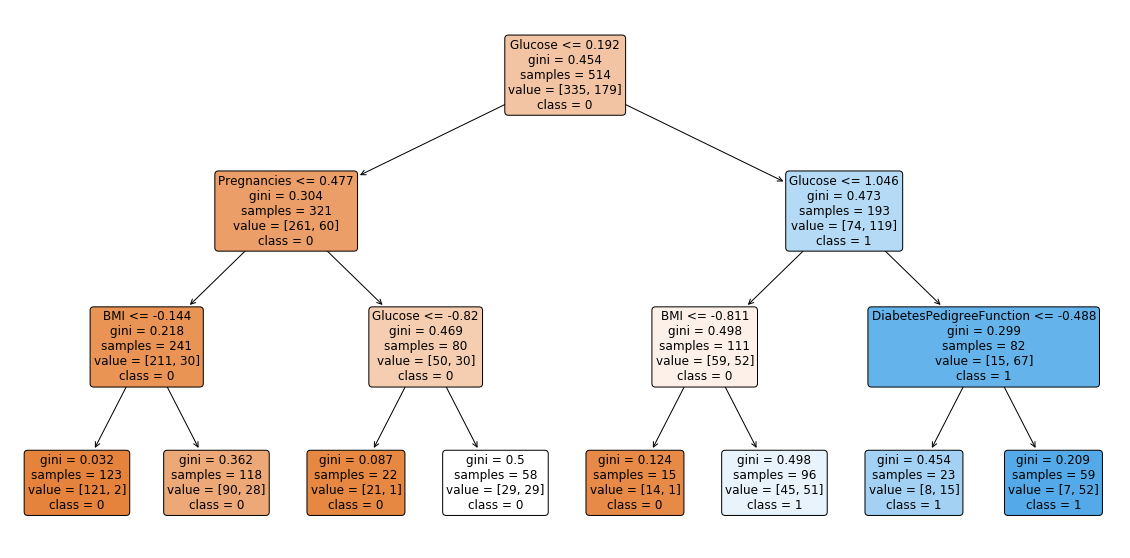

In [14]:
plt.figure(figsize=(20, 10))
tree.plot_tree(model, fontsize=12, feature_names=list(X.columns), filled=True, rounded=True, class_names=['0','1'])

Još jedan zaključak koji se lako može izvesti iz stabla odlučivanja tiče se važnosti atributa. U zavisnosti od toga koliko puta se atribut iskoristi u procesu grananja, može se oceniti njegova značajnost na skali od 0 do 1. 

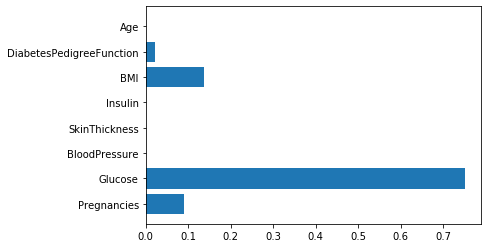

In [15]:
plt.barh(list(X.columns), model.feature_importances_)
plt.show()

Kako stabla prati visoka varijabilnost u praksi ih najčešće udružujemo u šume. 

# Slučajne šume

Podsetimo se, slučajne šume omogućavaju treniranje većeg broj stabala odlučivanja (takozvani ansambl) nad slučajno odabranim podskupovima instanci i, opciono, slučajno odabranim podskupovima njihovih atributa. Rezultati pojedinačnih stabala u slučaju regresionih zadataka se uprosečavaju, dok se u slučaju klasifikacionih zadataka o finalnom obeležju odlučuje na osnovu većinskog glasanja.

Funkcije za rad sa anamblima su dostupne kroz `ensamble` paket `scikit-learn` biblioteke.

In [16]:
from sklearn import ensemble

Na nivou ansambla se može zadati broj stabala koja se treniraju (`n_estimators` parametar), kao i svojstva koja prate stabla (kriterijum homogenosti, maksimalna dubina stabla, maksimalni broj atributa,..). Svojstvom `max_samples` se može uticati na veličinu podskupa instanci nad kojim se stabla treniraju. Praksa je da se kroz `random_state` parametar prati slučajnost u podelama kako bi eksperimenti mogli da se reprodukuju.  

In [17]:
model_forest = ensemble.RandomForestClassifier(n_estimators=20, max_depth=3, random_state=7)

In [18]:
model_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [19]:
y_predicted = model_forest.predict(X_test)

In [20]:
metrics.accuracy_score(y_test, y_predicted)

0.7598425196850394

Sada i grafik pojedinačnih važnosti atributa izgleda nešto drugacije. 

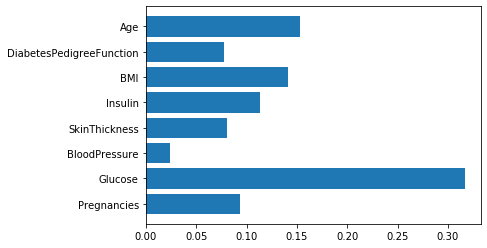

In [21]:
plt.barh(list(X.columns), model_forest.feature_importances_)
plt.show()

Hiperparametre koji prate stabla odlučivanja određujemo unakrsnom validacijom. O tome će biti više reči na narednom času. 

Važno je napomenuti da se slučajne šume mogu kreirati i nad drugim baznim modelima podešavanjem parametra `base_estimator`, ali je u praksi najprisutniji rad sa samim stablima odlučivanja. 

### Predlozi za dalje čitanje:
- https://scikit-learn.org/stable/modules/tree.html